In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

In [2]:
HDDdata = pd.read_csv("Resources/Source_Data/HDD-Features.csv")
BlocPower = pd.read_csv("Resources/Source_Data/BlocPower_T.csv")
CDD_HDDdata = pd.read_csv("Resources/Source_Data/CDD-HDD-Features.csv")
location_df = pd.read_csv("Resources/Source_Data/location_information.csv")
CombinedSensordata = pd.read_csv("Cleaned_data/CombinedSensorData.csv")
ClusterEnergyLocation = pd.read_csv("Cleaned_data/clusterEnergyLocation.csv")                      

In [3]:
BlocPower.head(5)

,UTSUM_Electricity_Usage,INFO_Year of Construction,INFO_Number of Stories,INFO_Total Square Feet,PLEI_1_Quantity,PLEI_3_Quantity
0,"117,870 kWh",1955,4,"14,600",1.0,2
1,"16,207 kWh",1940,1,600,1.0,NaN
2,"15,564 kWh",1920,2,"6,000",2.0,1
3,"25,851 kWh",1965,1,"5,000",6.0,1
4,"32,343 kWh",1930,3,"4,196",1.0,1


In [4]:
BlocPower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
UTSUM_Electricity_Usage      98 non-null object
INFO_Year of Construction    100 non-null object
INFO_Number of Stories       103 non-null int64
INFO_Total Square Feet       103 non-null object
PLEI_1_Quantity              95 non-null float64
PLEI_3_Quantity              88 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 4.9+ KB


In [5]:
Combined_Energy_df = pd.concat([BlocPower,CDD_HDDdata,location_df], axis=1)

In [6]:
Combined_Energy_df.head(5)

,UTSUM_Electricity_Usage,INFO_Year of Construction,INFO_Number of Stories,INFO_Total Square Feet,PLEI_1_Quantity,PLEI_3_Quantity,Property Name,plug_load_consumption,ac_consumption,domestic_gas,heating_gas,AddressID,property_name,Address,Zipcode,Long,Lat
0,"117,870 kWh",1955,4,"14,600",1.0,2,ChurchofStCeciliaReport,11.651406,0.983531,0.096226,0.366193,125 East 105th Street10029,ChurchofStCeciliaReport,125 East 105th Street,10029,-73.947326,40.791919
1,"16,207 kWh",1940,1,600,1.0,NaN,69thLaneStudio,32.769884,5.008372,0.322600,0.579592,69-71 Grand Avenue11378,69thLaneStudio,69-71 Grand Avenue,11378,-73.893311,40.727435
2,"15,564 kWh",1920,2,"6,000",2.0,1,UnitarianChurchofStatenIsland,2.345049,0.296134,0.032706,0.036461,312 Fillmore St10301,UnitarianChurchofStatenIsland,312 Fillmore St,10301,-74.098698,40.642981
3,"25,851 kWh",1965,1,"5,000",6.0,1,SSolowayandSonsPIPPrinting,4.618817,0.765189,0.027504,0.234664,421 Doughty Blvd11096,SSolowayandSonsPIPPrinting,421 Doughty Blvd,11096,-73.746996,40.622674
4,"32,343 kWh",1930,3,"4,196",1.0,1,SunnysideJewishCenterReport,9.323896,1.234326,0.322600,0.579592,40-20 47th Avenue11104,SunnysideJewishCenterReport,40-20 47th Avenue,11104,-73.923901,40.741461


In [7]:
dfBlocPower =Combined_Energy_df.rename(index=str, columns={
                                          "UTSUM_Electricity_Usage": "energy", 
                                          "INFO_Year of Construction": "year",
                                          "INFO_Number of Stories": "number_stories",
                                          "INFO_Total Square Feet": "square_feet",
                                          "PLEI_1_Quantity": "plei_1",
                                          "PLEI_3_Quantity": "plei_3"
                                         })
dfBlocPower.head()

,energy,year,number_stories,square_feet,plei_1,plei_3,Property Name,plug_load_consumption,ac_consumption,domestic_gas,heating_gas,AddressID,property_name,Address,Zipcode,Long,Lat
0,"117,870 kWh",1955,4,"14,600",1.0,2,ChurchofStCeciliaReport,11.651406,0.983531,0.096226,0.366193,125 East 105th Street10029,ChurchofStCeciliaReport,125 East 105th Street,10029,-73.947326,40.791919
1,"16,207 kWh",1940,1,600,1.0,NaN,69thLaneStudio,32.769884,5.008372,0.322600,0.579592,69-71 Grand Avenue11378,69thLaneStudio,69-71 Grand Avenue,11378,-73.893311,40.727435
2,"15,564 kWh",1920,2,"6,000",2.0,1,UnitarianChurchofStatenIsland,2.345049,0.296134,0.032706,0.036461,312 Fillmore St10301,UnitarianChurchofStatenIsland,312 Fillmore St,10301,-74.098698,40.642981
3,"25,851 kWh",1965,1,"5,000",6.0,1,SSolowayandSonsPIPPrinting,4.618817,0.765189,0.027504,0.234664,421 Doughty Blvd11096,SSolowayandSonsPIPPrinting,421 Doughty Blvd,11096,-73.746996,40.622674
4,"32,343 kWh",1930,3,"4,196",1.0,1,SunnysideJewishCenterReport,9.323896,1.234326,0.322600,0.579592,40-20 47th Avenue11104,SunnysideJewishCenterReport,40-20 47th Avenue,11104,-73.923901,40.741461


In [8]:
# Remove missing values with dropna method
dfBlocPower.dropna(inplace = True)

dfBlocPower.head()

,energy,year,number_stories,square_feet,plei_1,plei_3,Property Name,plug_load_consumption,ac_consumption,domestic_gas,heating_gas,AddressID,property_name,Address,Zipcode,Long,Lat
0,"117,870 kWh",1955,4,"14,600",1.0,2,ChurchofStCeciliaReport,11.651406,0.983531,0.096226,0.366193,125 East 105th Street10029,ChurchofStCeciliaReport,125 East 105th Street,10029,-73.947326,40.791919
2,"15,564 kWh",1920,2,"6,000",2.0,1,UnitarianChurchofStatenIsland,2.345049,0.296134,0.032706,0.036461,312 Fillmore St10301,UnitarianChurchofStatenIsland,312 Fillmore St,10301,-74.098698,40.642981
3,"25,851 kWh",1965,1,"5,000",6.0,1,SSolowayandSonsPIPPrinting,4.618817,0.765189,0.027504,0.234664,421 Doughty Blvd11096,SSolowayandSonsPIPPrinting,421 Doughty Blvd,11096,-73.746996,40.622674
4,"32,343 kWh",1930,3,"4,196",1.0,1,SunnysideJewishCenterReport,9.323896,1.234326,0.322600,0.579592,40-20 47th Avenue11104,SunnysideJewishCenterReport,40-20 47th Avenue,11104,-73.923901,40.741461
5,"106,938 kWh",1910,1,"2,200",2.0,1,MoonbluIncdbaJoyBurgerBar,45.173950,8.437620,3.813677,0.673378,361 6th Ave10014,MoonbluIncdbaJoyBurgerBar,361 6th Ave,10014,-74.000832,40.732327


In [9]:
# Cleaning function for 'square_feet' data
# Reformat the values to get an actual number (e.g., 117,870 kWh to 117870)
def clean_energy(v): 
    if (v=='') or v==None: return np.nan
    v = v.split(' ')[0].replace(',','')
    return np.nan if(v=='') else float(v)

# Function for cleaning 'year' data 
# Compute the age of a buildings, given the year of construction
def clean_age(v):
    if (v=='') or v==None: return np.nan
    v = v.encode('ascii','ignore')
    return (2018 - float(v)) if(len(v)==4) else np.nan

# Function for cleaning 'number_stories' data
def clean_stories(v):
    if (v=='') or v==None: return np.nan
    return float(v)

# Function for cleaning 'number_stories' data
# Get rid of commas 
def clean_sqFeet(v):
    if (v=='') or v==None: return np.nan
    v = v.replace(',','')
    return np.nan if(v=='') else float(v) 

# Function for cleaning 'plei_1' and 'plei_3' data
# in the 'plei_1' and 'plei_3' columns, missing values can be interpeted as 0 plugged equipment
def clean_plei(v): 
    try:
        vv = float(v)
    except:
        vv = 0.0
    return vv

In [10]:
# Apply cleaning function to the 'energy' data
dfBlocPower['energy'] = dfBlocPower['energy'].map(lambda x: clean_energy(x))

# Apply cleaning function to the 'year' data
dfBlocPower['year'] = dfBlocPower['year'].map(lambda x: clean_age(x))
# change 'year' column name to 'age'
dfBlocPower.rename(columns={'year':'age'}, inplace=True)

# Apply cleaning function to the 'number_stories' data
dfBlocPower['number_stories'] = dfBlocPower['number_stories'].map(lambda x: clean_stories(x))

# Apply cleaning function to the 'square_feet' data
dfBlocPower['square_feet'] = dfBlocPower['square_feet'].map(lambda x: clean_sqFeet(x))

# Apply cleaning function to the 'plei_1' data
dfBlocPower['plei_1'] = dfBlocPower['plei_1'].map(lambda x: clean_plei(x))

# Apply cleaning function to the 'plei_3' data
dfBlocPower['plei_3'] =dfBlocPower['plei_3'].map(lambda x: clean_plei(x))

In [11]:
dfBlocPower.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 102
Data columns (total 17 columns):
energy                   80 non-null float64
age                      76 non-null float64
number_stories           80 non-null float64
square_feet              80 non-null float64
plei_1                   80 non-null float64
plei_3                   80 non-null float64
Property Name            80 non-null object
plug_load_consumption    80 non-null float64
ac_consumption           80 non-null float64
domestic_gas             80 non-null float64
heating_gas              80 non-null float64
AddressID                80 non-null object
property_name            80 non-null object
Address                  80 non-null object
Zipcode                  80 non-null int64
Long                     80 non-null float64
Lat                      80 non-null float64
dtypes: float64(12), int64(1), object(4)
memory usage: 11.2+ KB


In [12]:
# Remove missing values with dropna method
dfBlocPower.dropna(inplace = True)
dfBlocPower.head()

,energy,age,number_stories,square_feet,plei_1,plei_3,Property Name,plug_load_consumption,ac_consumption,domestic_gas,heating_gas,AddressID,property_name,Address,Zipcode,Long,Lat
0,117870.0,63.0,4.0,14600.0,1.0,2.0,ChurchofStCeciliaReport,11.651406,0.983531,0.096226,0.366193,125 East 105th Street10029,ChurchofStCeciliaReport,125 East 105th Street,10029,-73.947326,40.791919
2,15564.0,98.0,2.0,6000.0,2.0,1.0,UnitarianChurchofStatenIsland,2.345049,0.296134,0.032706,0.036461,312 Fillmore St10301,UnitarianChurchofStatenIsland,312 Fillmore St,10301,-74.098698,40.642981
3,25851.0,53.0,1.0,5000.0,6.0,1.0,SSolowayandSonsPIPPrinting,4.618817,0.765189,0.027504,0.234664,421 Doughty Blvd11096,SSolowayandSonsPIPPrinting,421 Doughty Blvd,11096,-73.746996,40.622674
4,32343.0,88.0,3.0,4196.0,1.0,1.0,SunnysideJewishCenterReport,9.323896,1.234326,0.322600,0.579592,40-20 47th Avenue11104,SunnysideJewishCenterReport,40-20 47th Avenue,11104,-73.923901,40.741461
5,106938.0,108.0,1.0,2200.0,2.0,1.0,MoonbluIncdbaJoyBurgerBar,45.173950,8.437620,3.813677,0.673378,361 6th Ave10014,MoonbluIncdbaJoyBurgerBar,361 6th Ave,10014,-74.000832,40.732327


In [13]:
x = dfBlocPower.drop(["Zipcode","Long","Lat","Property Name","AddressID","property_name","Address"],axis=1)
x.head(5)

,energy,age,number_stories,square_feet,plei_1,plei_3,plug_load_consumption,ac_consumption,domestic_gas,heating_gas
0,117870.0,63.0,4.0,14600.0,1.0,2.0,11.651406,0.983531,0.096226,0.366193
2,15564.0,98.0,2.0,6000.0,2.0,1.0,2.345049,0.296134,0.032706,0.036461
3,25851.0,53.0,1.0,5000.0,6.0,1.0,4.618817,0.765189,0.027504,0.234664
4,32343.0,88.0,3.0,4196.0,1.0,1.0,9.323896,1.234326,0.322600,0.579592
5,106938.0,108.0,1.0,2200.0,2.0,1.0,45.173950,8.437620,3.813677,0.673378


In [16]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} scikit-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\kisho\AppData\Local\conda\conda\envs\python37

  added / updated specs: 
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-learn-0.20.0        |   py36heebcf9a_1         5.2 MB
    certifi-2018.10.15         |           py36_0         138 KB
    ------------------------------------------------------------
                                           Total:         5.3 MB

The following NEW packages will be INSTALLED:

    scikit-learn: 0.20.0-py36heebcf9a_1

The following packages will be UPDATED:

    certifi:      2018.8.24-py36_1      --> 2018.10.15-py36_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done



scikit-learn-0.20.0  | 5.2 MB    |            |   0% 
scikit-learn-0.20.0  | 5.2 MB    | 2          |   2% 
scikit-learn-0.20.0  | 5.2 MB    | #5         |  15% 
scikit-learn-0.20.0  | 5.2 MB    | ##6        |  26% 
scikit-learn-0.20.0  | 5.2 MB    | ###6       |  36% 
scikit-learn-0.20.0  | 5.2 MB    | ####7      |  48% 
scikit-learn-0.20.0  | 5.2 MB    | #####7     |  58% 
scikit-learn-0.20.0  | 5.2 MB    | ######6    |  67% 
scikit-learn-0.20.0  | 5.2 MB    | #######5   |  75% 
scikit-learn-0.20.0  | 5.2 MB    | ########3  |  83% 
scikit-learn-0.20.0  | 5.2 MB    | ########9  |  89% 
scikit-learn-0.20.0  | 5.2 MB    | #########3 |  93% 
scikit-learn-0.20.0  | 5.2 MB    | #########6 |  96% 
scikit-learn-0.20.0  | 5.2 MB    | #########8 |  99% 
scikit-learn-0.20.0  | 5.2 MB    | ########## | 100% 

certifi-2018.10.15   | 138 KB    |            |   0% 
certifi-2018.10.15   | 138 KB    | ########## | 100% 


In [17]:
from sklearn import preprocessing

cols = x.columns
scaler = preprocessing.MaxAbsScaler()


In [18]:
x = scaler.fit_transform(x)
dfScaled = pd.DataFrame(x,columns=cols)

In [20]:
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\kisho\AppData\Local\conda\conda\envs\python37

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.9.0              |           py36_0         379 KB

The following NEW packages will be INSTALLED:

    patsy:       0.5.0-py36_0        
    seaborn:     0.9.0-py36_0        
    statsmodels: 0.9.0-py36h452e1ab_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done



seaborn-0.9.0        | 379 KB    |            |   0% 
seaborn-0.9.0        | 379 KB    | #########1 |  92% 
seaborn-0.9.0        | 379 KB    | ########## | 100% 


C:\Users\kisho\AppData\Local\conda\conda\envs\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kisho\AppData\Local\conda\conda\envs\python37\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kisho\AppData\Local\conda\conda\envs\python37\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\kisho\AppData\Local\conda\conda\envs\python37\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invali

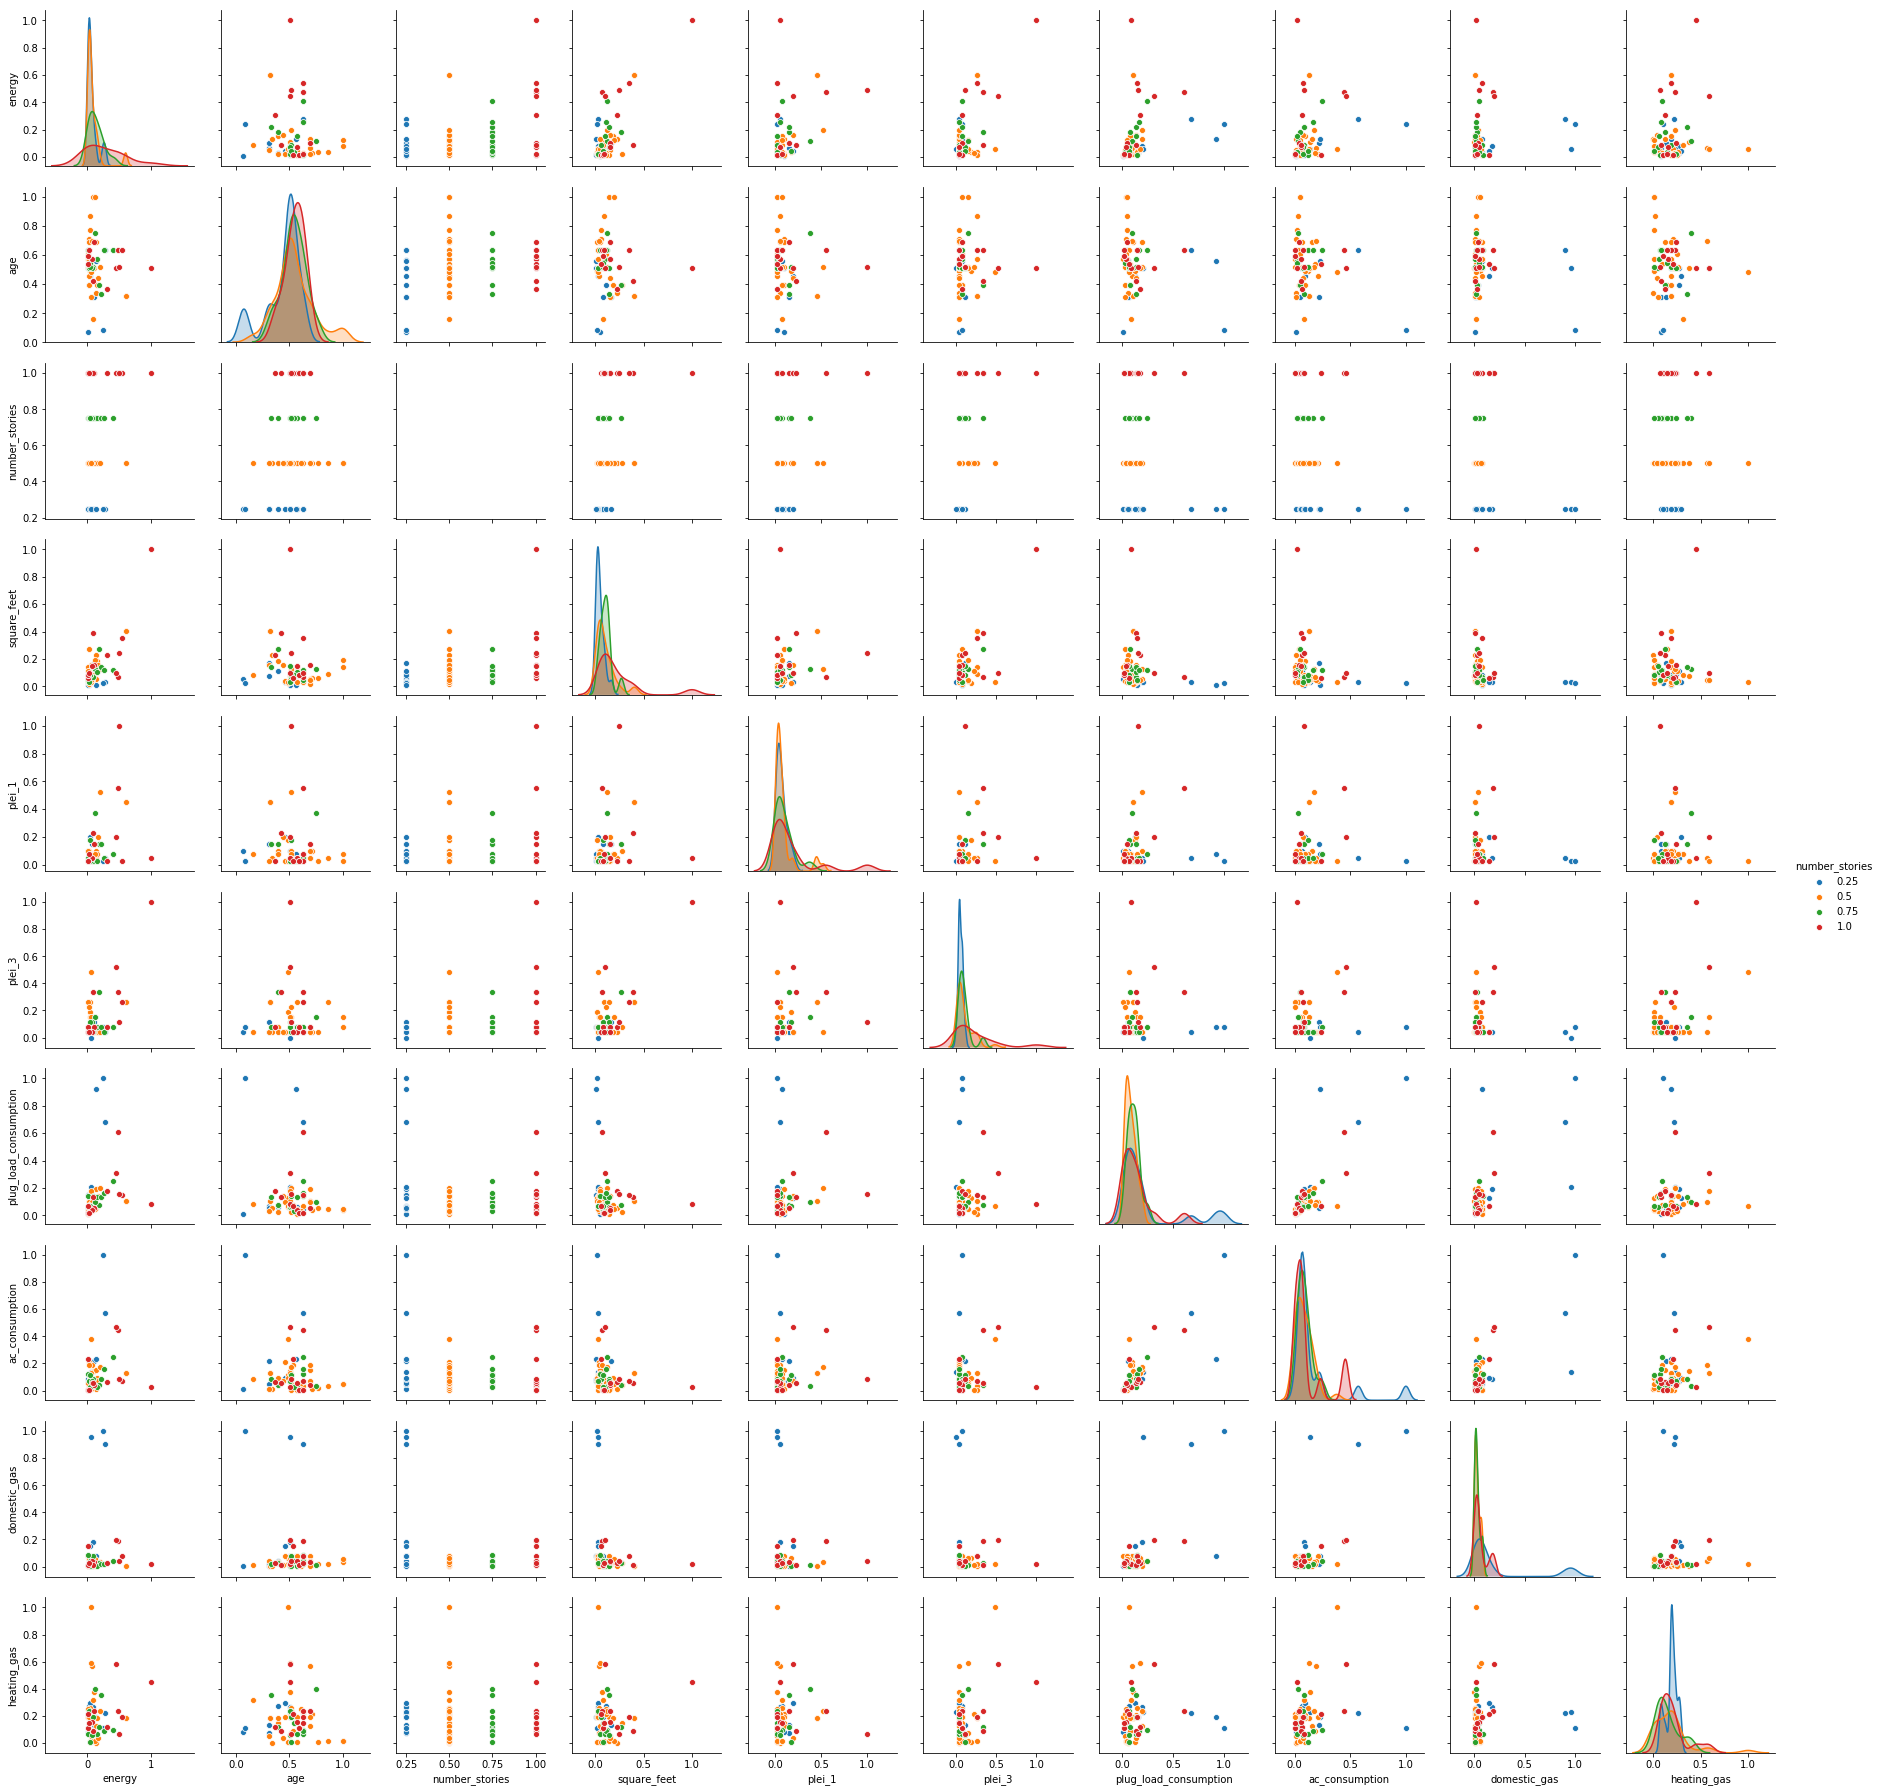

In [21]:
import seaborn as sns

sns_plot = sns.pairplot(dfScaled, hue='number_stories')
sns_plot.savefig("Resources/Images/pairplot.png")

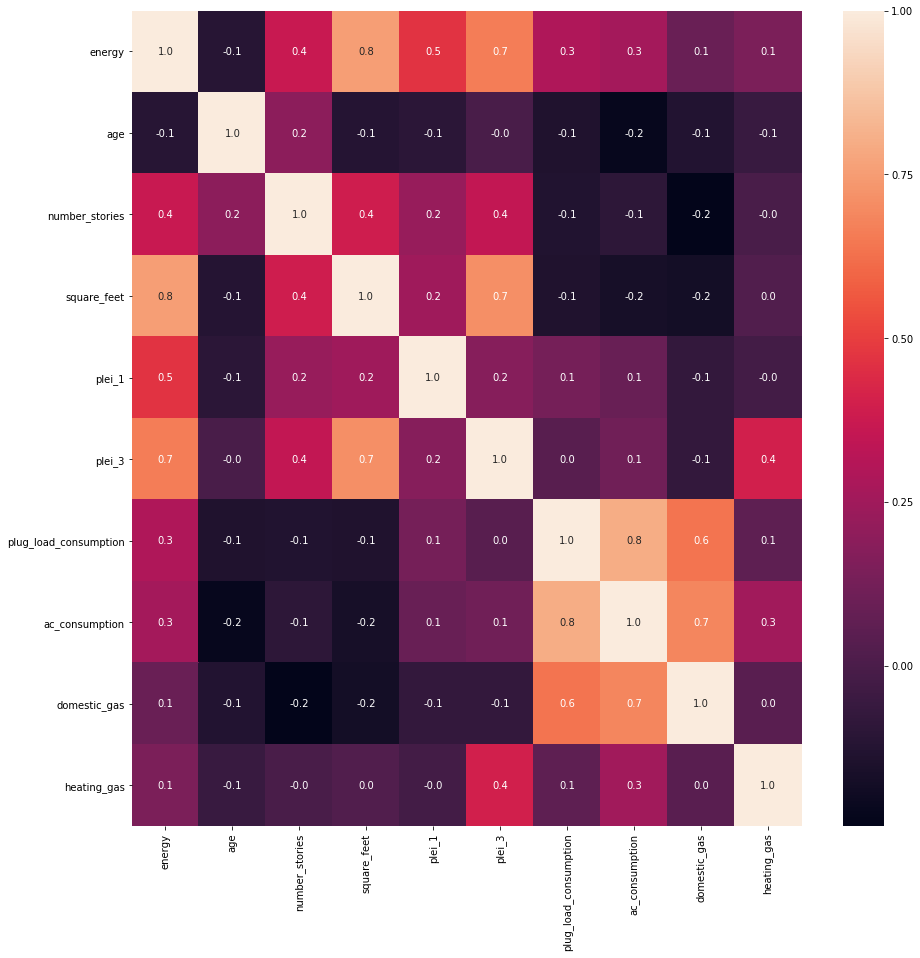

In [22]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(dfScaled.corr(), annot = True, fmt = ".1f")

fig.savefig("Resources/Images/heatmap.png")


In [23]:

# get a list of the features used to explain energy
features = dfScaled.columns.tolist()
response = ['energy']
features.remove(response[0])
# import regression solver
from sklearn import linear_model
# declare a linear regression model 
lr = linear_model.LinearRegression(fit_intercept=True)
# define response variable: energy usage
y = np.asarray(dfScaled[response]) 
# define features
X = dfScaled[features]
# fit regression model to the data
regr = lr.fit(X,y)
coefs = regr.coef_[0]
# collect regression coefficients
dataRegQ = []
dataRegQ.append(('Intercept', regr.intercept_[0]))
for i in range(len(features)):
    dataRegQ.append((features[i],coefs[i]))
# compute energy predictions using our fitted model     
yh = regr.predict(X)
# import package to compute the R-squared quality metric
from sklearn.metrics import r2_score
# print results
print ('R-Squared: ', r2_score(y,yh))
pd.DataFrame(dataRegQ,columns=['feature_name','coefficient']) #.head()

R-Squared:  0.8148086777460263


,feature_name,coefficient
0,Intercept,-0.144027
1,age,0.066229
2,number_stories,0.043700
3,square_feet,0.939022
4,plei_1,0.258915
5,plei_3,0.022835
6,plug_load_consumption,0.245344
7,ac_consumption,0.225375
8,domestic_gas,-0.021962
9,heating_gas,0.079262


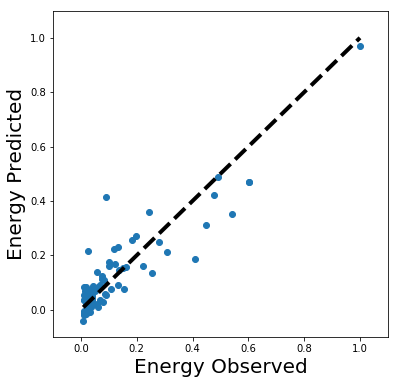

In [24]:


fig, ax = plt.subplots()
ax.scatter(y, yh)
#print(y)
#print(yh)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Energy Observed',fontsize=20)
ax.set_ylabel('Energy Predicted',fontsize=20)
ax.axis([-0.1, 1.1, -0.1, 1.1])
plt.gcf().set_size_inches( (6, 6) )
fig.savefig('Resources/Images/linearregression.png')
plt.show()

In [26]:
# import regression model 
from sklearn.linear_model import LinearRegression
import patsy
from sklearn.model_selection import train_test_split

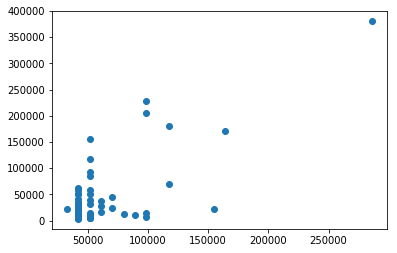

In [27]:
# Define 'formula'
formula = 'energy ~ plei_3'

# Making your X matrix and Yhat matrix
y, x = patsy.dmatrices(formula, data=dfBlocPower)

# Creating Train and test data with a 33% of total test size
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.80)

# Extentiate/initialize linear regression
linreg = LinearRegression()

# Fitting model with train data
linreg.fit(xtrain, ytrain)

# Testing model on 33% of total data that it(model) hasn't seen before
linreg.score(xtest, ytest)

# Creating predictions given the fit
pred = linreg.predict(xtest)

# Visualizing the model predictions against the true data
plt.scatter(pred, ytest)

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [29]:
#importing sqlite library
import sqlite3
from sqlite3 import Error

In [30]:
# Function to create a sqlite db
def create_sqlite_connection(db_file):
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        conn.close()
    



In [31]:
# creating a sqlite connection
create_sqlite_connection('Resources/project2energy.sqlite')

2.6.0


In [32]:
engine = create_engine("sqlite:///Resources/project2energy.sqlite")

In [33]:
#Writing tables to database
dfBlocPower.to_sql('BlocPower', engine, if_exists = 'replace')
# #verified using DBlite sqlite browser that data is written

In [35]:
dfBlocPower.to_json(path_or_buf = 'Resources/Json/data.json',orient = 'index')